# CM20219 – Image Warping Lab

This lab will explore image warping.
You should download the supporting images from the lab page on the auto-marker, and put them into the same directory as this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Make figures larger.
plt.rcParams['figure.figsize'] = [10, 6]

## Try commenting this out if plots look blurry on your screen.
# %config InlineBackend.figure_format = 'retina'

----
## 1. Forward mapping [25 marks]

Let us start by implementing image warping using forward mapping.
Every pixel in the source image is transformed to the target image independently, leading to gaps between the transformed pixels in the target image.

Feel free to experiment by changing the transformation ‘M’, for example by changing the rotation angle or the scaling transform, or using a random transformation (commented out).

In [3]:
source = plt.imread('mona.jpg') / 255.

## Basic transformations to manipulate the source image.
T = np.array([[1, 0, -source.shape[1] / 2],
              [0, 1, -source.shape[0] / 2],
              [0, 0, 1]])
t = np.pi / 4
R = np.array([[np.cos(t), -np.sin(t), 0],
              [np.sin(t),  np.cos(t), 0],
              [ 0, 0, 1]])
S = np.diag([2, 2, 1])

## The warping transformation (rotation about arbitrary point).
M = np.linalg.inv(T) @ R @ S @ T

# ## The auto-marker tries out random transformations like this.
# M = np.random.rand(3, 3)
# M[:2,2] = 200 * M[:2,2] - 10
# M[2] = 0.001 * M[2]
# M[2,2] = 1
# M = np.linalg.inv(T) @ M @ np.diag(np.random.rand(3)) @ T

a) Implement a function to transform a point (x, y) using a homogeneous 2D transform matrix. [10 marks]

In [4]:
def transform_pixel_nn(x, y, transform):
    """Transforms a source pixel coordinate (x, y) using 'transform', and rounds to the nearest pixel
    coordinate. Returns a tuple (x', y')."""

    homogenous_vector = [[x],[y],[1]]
    
    transformed = transform @ homogenous_vector
    
#     print(transformed)
    
    rounding_x = int(round(transformed[0][0]/transformed[2][0]))
    rounding_y =int(round(transformed[1][0]/transformed[2][0]))
    
    transformed_points = (rounding_x,rounding_y)
    return transformed_points
    
    ## TASK: Replace this code with your own implementation.

#     return (0, 0)
#     return   


b) Implement forward mapping using your per-pixel transform function. [15 marks]

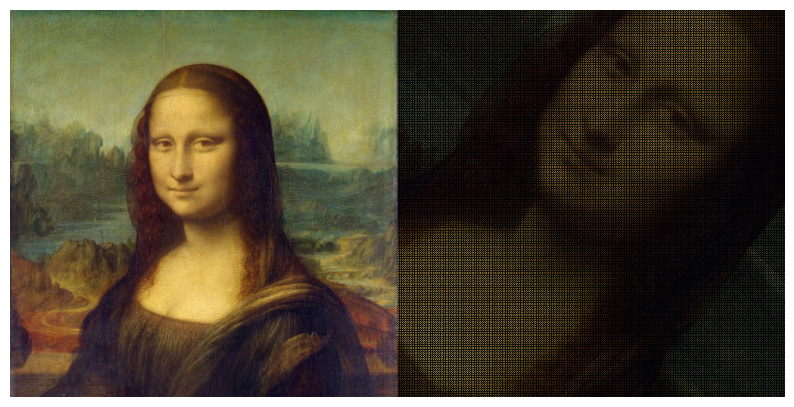

In [5]:
def forward_mapping(source, transform):
    """Warps the 'source' image by the given 'transform' using forward mapping."""

    ## TASK: Replace this code with your own implementation.
#     creating empty array 'target' with same shape as source image
    target = np.zeros_like(source)
    
#     iterating over each pixel in the source image
    for y in range(source.shape[0]):
        for x in range(source.shape[1]):
            
#             p= np.array([x,y,1]).T

#           homogenous vector for that pixel
            p = [[x],[y],[1]]
#     getting new transformed coordinate vector q, as transormation matrix M * homoegenous verctor for that pixel
            q = M @ p
    
#     getting target pixel 
#             u = int(np.rint(q[0]/q[2]))
#             v = int(np.rint(q[1] / q[2]))
            u,v = transform_pixel_nn(x,y,transform)
        
#             checking if target coordinates are within valid range of the target image
            if(0<= u < target.shape[1] and 0<= v < target.shape[0]):
#         now copy color values from source to target image
                target[v,u] = source[y,x]
#   returning wrapped image 
    return target
    

## Visualise input (left) and warped output (right).
target = forward_mapping(source, M)
plt.imshow(np.hstack([source, target]))
plt.axis("off");

----
## 2. Backward mapping [15 marks]

Based on your implementation of “forward_mapping”, or otherwise, implement backward mapping using the same 2D transformation ‘M’.
Backward mapping computes for each target image pixel where in the source image it originated, and uses the colour sampled from the nearest pixel.
Note that this should not leave any gaps in the warped image.

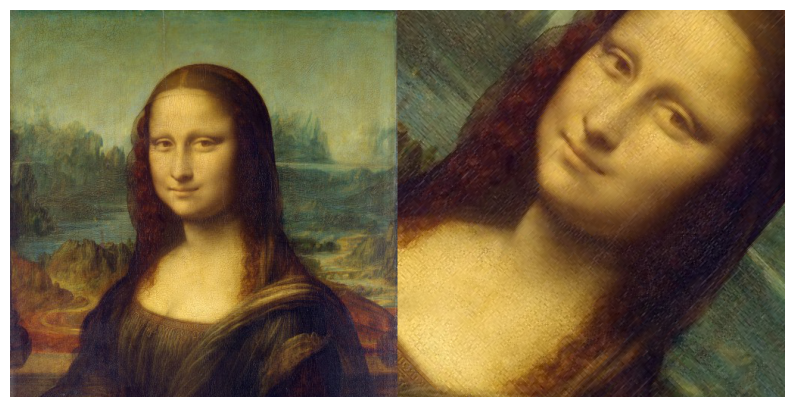

In [6]:
def backward_mapping(source, transform):
    target = np.zeros_like(source)
#     inverse transformation matrix to map pixels from target to source image
    inverse_transformation  = np.linalg.inv(transform)
    
#     iterating thorugh target image 
    for y in range(target.shape[0]):
        for x in range(target.shape[1]):
            
#             getting inverse transofmation of that pixel

            homogenous_vector = np.array([[x],[y],[1]])
    
#     transforming target pixels to the source pixels
            transformed = inverse_transformation @ homogenous_vector
            
            
#           rounding coordinates to nearest integer

        
            u = int (np.rint(transformed[0] / transformed[2]))
            v = int(np.rint(transformed[1]/transformed[2]))

            
#             checking if rounded coordinates are within the range of the souce image
            if(0<= u < source.shape[1] and 0 <= v < source.shape[0]):
                target[y,x] = source[v,u]
    return target


## Visualise input (left) and warped output (right).
target = backward_mapping(source, M)
plt.imshow(np.hstack([source, target]))
plt.axis("off");

----
## 3. Linear interpolation [20 marks]

a) Extend your backward-mapping function to sample pixel colours from the source image using bilinear interpolation. [15 marks]

b) Handle the edge cases carefully for full marks, i.e. fade to black when sampling pixels on the boundary of the source image. [5 marks]

Hint: It may be helpful to use the commented-out transformations `M`.

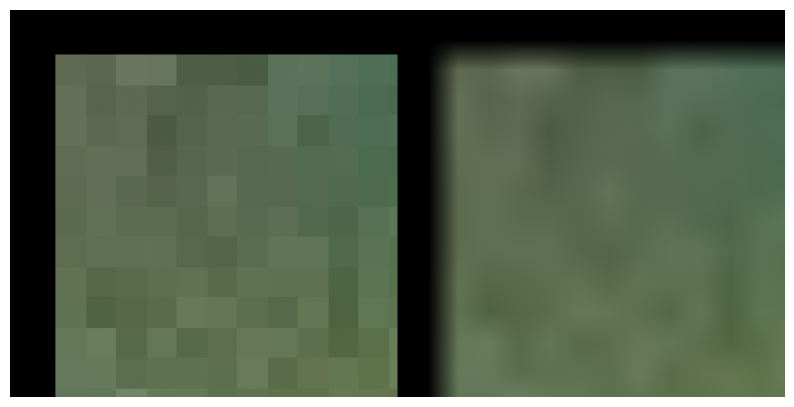

In [7]:
def backward_mapping_bilinear(source, transform):
    """Warps the 'source' image by the given 'transform' using backward mapping with bilinear interpolation."""
    
    ## TASK: Replace this code with your own implementation.
    target = np.zeros_like(source)
    inverse_transformation = np.linalg.inv(transform)
    padding_width = ((1,1),(1,1),(0,0))
    padding_input_source = np.pad(source,padding_width, mode = 'constant')
    
#     iterating through target image
    for y in range(target.shape[0]):
        for x in range(target.shape[1]):
            
#             mapping the pixel from target image to its position in the source image
            homogenous_vector = np.array([[x],[y],[1]])
            transformed = inverse_transformation @ homogenous_vector
            
#             getting integers for nearest neighbour
            u = int(np.floor(transformed[0,0])) + 1
            v = int(np.floor(transformed[1,0])) + 1
            
#             setting the bounds of the source image
            lower_bound_u = 0 # leftmost column 
            upper_bound_u = source.shape[1] - 1 #rightmost column
            lower_bound_v = 0 #top row 
            upper_bound_v = source.shape[0] - 1 # last row
#          checking if u and v are within bounds
            u_within_bounds = lower_bound_u <= u < upper_bound_u
            v_within_bounds = lower_bound_v <= v < upper_bound_v

            if u_within_bounds:
                if v_within_bounds:
#         these are the pixels in the source image 
                    v_floor =int(np.floor(v))
                    u_floor=int(np.floor(u))
                    v_ceil = int(np.ceil(v)) + 1
                    u_ceil = int(np.ceil(u)) + 1
                    
#                   getting the 4 points which will be used in bilinear interpolation
                    top_left_point = padding_input_source[v_floor, u_floor]
                    top_right_point = padding_input_source[v_floor, u_ceil]
                    bottom_left_point = padding_input_source[v_ceil, u_floor]
                    bottom_right_point = padding_input_source[v_ceil, u_ceil]

    #                 getting decimal part , which presents how far the transformed point is form the nearest integet pixel
                    u_decimal = transformed[0,0] - np.floor(transformed[0,0])
                    v_decimal = transformed[1,0]  - np.floor(transformed[1,0])
    #               bilinear interpolation  
                    result = (1-v_decimal) * ((1-u_decimal) * top_left_point + u_decimal * top_right_point) +v_decimal * ((1-u_decimal) * bottom_left_point + u_decimal * bottom_right_point)

        # result stored in target image
                    target[y,x] = result 
    return target
## Compare nearest-neighbour (left) and bilinear interpolation (right) side by side.
# M = np.array([[12, 0, -2486], [0, 12, -2508], [0, 0, 1]])  # big smile
M = np.array([[40, 0, 80], [0, 40, 80], [0, 0, 1]])  # check edge handling
target_nearest  = backward_mapping(source, M)
target_bilinear = backward_mapping_bilinear(source, M)
plt.imshow(np.hstack([target_nearest, target_bilinear]))
plt.axis("off");

----
## 4. Lens undistortion [40 marks]

This exercise applies a different warping function that is commonly used for removing lens
distortion from images, i.e. to make straight lines straight again.

The polynomial lens distortion model uses the following steps for computing the location $(u', v')$ to sample from the source image for a target image location $(u, v)$:

$$\begin{align}
x &= (u - p_x) / f_x \\
y &= (v - p_y) / f_y \\
r^2 &= x^2 + y^2 \\
x' &= x \cdot (1 + k_1 r^2 + k_2 r^4 + k_3 r^6) \\
y' &= y \cdot (1 + k_1 r^2 + k_2 r^4 + k_3 r^6) \\
u' &= x' \cdot f_x + p_x \\
v' &= y' \cdot f_y + p_y
\end{align}$$

Here, $f_x$ and $f_y$ are the focal lengths of the camera, $(p_x, p_y)$ is called the _principal point_ or _centre of projection_, and $k_1$, $k_2$, $k_3$ are _lens distortion coefficients_.

a) Implement polynomial lens undistortion using the steps above for a single pixel (u, v). [10 marks]

Recall that:
* The `camera_matrix` is defined as $\mathbf{K} = \begin{bmatrix}f_x & 0 & p_x \\ 0 & f_y & p_y \\ 0 & 0 & 1\end{bmatrix}$.
* The lens distortion coefficients `dist_coeffs` are given as $\begin{bmatrix}k_1 & k_2 & k_3\end{bmatrix}$.

In [8]:
def undistort_point(u, v, camera_matrix, dist_coeffs):
    """Undistorts a pixel's coordinates (u, v) using the given camera matrix and
    distortion coefficients. Returns a tuple (u', v')."""
    
    x = (u- camera_matrix[0][2]) / camera_matrix[0][0]
    y = (v- camera_matrix[1][2]) / camera_matrix[1][1]
    
    r_squared = (x**2) + (y**2)
    
    x_modified = x * (1 + (dist_coeffs[0] * r_squared) + ((dist_coeffs[1] * (r_squared ** 2 ))) + (((dist_coeffs[2]) * (r_squared **3))))
    y_modified = y * (1 + (dist_coeffs[0] * r_squared) + ((dist_coeffs[1] * (r_squared ** 2 ))) + (((dist_coeffs[2]) * (r_squared **3))))
    
    u_modified = x_modified * camera_matrix[0][0] + camera_matrix[0][2]
    v_modified = y_modified * camera_matrix[1][1] +camera_matrix[1][2]
                      
    ## TASK: Replace this code with your own implementation.
    return u_modified, v_modified

b) Implement polynomial lens undistortion for a given image using your `undistort_point` function above and backward mapping with bilinear interpolation. [10 marks]

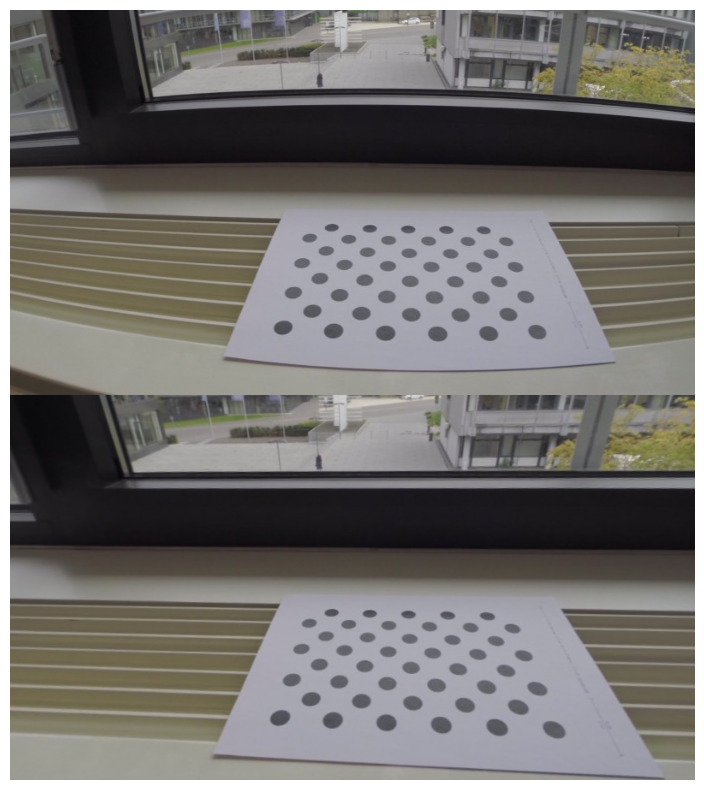

In [9]:
def undistort_image(image, camera_matrix, dist_coeffs):
    """Undistorts an image using the given camera matrix and distortion coefficients."""

    ## TASK: Replace this code with your own implementation.
#     return np.zeros_like(image)

#     this will be the undistorted output image
    target = np.zeros_like(image)
    for y in range(target.shape[0]):
        for x in range(target.shape[1]):
            u_modified,v_modified =undistort_point(x,y,camera_matrix,dist_coeffs)
            
            #             checking if undistorted coordinates are within the bounds of the source image
            if 0<=u_modified<target.shape[1] - 1 and 0<= v_modified < target.shape[0] - 1:
                u_modified_floor = int(np.floor(u_modified))
                v_modified_floor = int(np.floor(v_modified))
#                 getting the decimal part
                u_decimal = u_modified - u_modified_floor
                v_decimal = v_modified - v_modified_floor
        
#         getting the 4 points
                top_left_point = image[v_modified_floor,u_modified_floor]
                top_right_point = image[v_modified_floor,u_modified_floor+1 ]
                
                bottom_left_point = image[v_modified_floor + 1, u_modified_floor]
                bottom_right_point = image[v_modified_floor+1, u_modified_floor+1 ]
                
#               bilinear interpolation  to get undistorted pixel value 
                result = (1 - v_decimal) * ((1-u_decimal) * top_left_point + u_decimal * top_right_point) + v_decimal * ((1-u_decimal) * bottom_left_point + u_decimal * bottom_right_point)                           
                
                target [y,x] = result
    return target


## The intrinsic camera matrix and lens undistortion coefficients for the test image.
source = plt.imread('window.jpg') / 255.
camera_matrix = np.array([[474.53, 0, 405.96], [0, 474.53, 217.81], [0, 0, 1]])
dist_coeffs = np.array([-0.27194, 0.11517, -0.029859])

## Visualise input (top) and undistorted output (bottom).
target = undistort_image(source, camera_matrix, dist_coeffs)
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(np.vstack([source, target]))
plt.axis("off");

----
c) **Advanced:** Implement fast image undistortion using vectorisation, without any for-loops. Your function should run in less than 3 seconds. [20 marks]

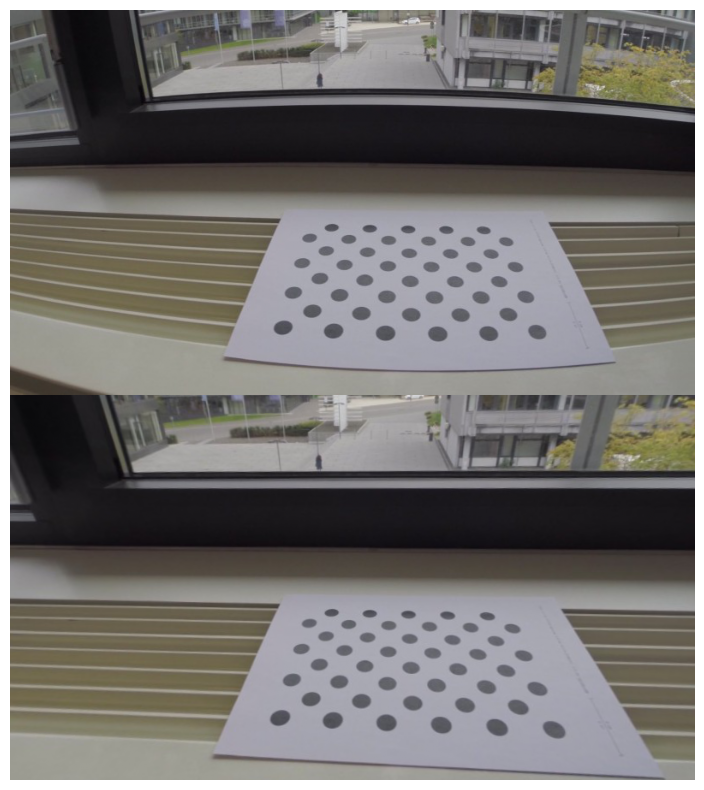

In [10]:
def undistort_image_vectorised(image, camera_matrix, dist_coeffs):
    """Undistorts an image using the given camera matrix and distortion coefficients.
    Use vectorised operations to avoid slow for loops."""

    ## TASK: Replace this code with your own implementation.
#     return np.zeros_like(image)
    
    
    target = np.zeros_like(image)
    rows_1d = np.arange(image.shape[0])
    columns_1d = np.arange(image.shape[1]) 
#     the meshgrid fot the pixels
    u,v = np.meshgrid(columns_1d,rows_1d)

#     flattening 2d to 1d
    u_flat_coords = u.flatten()
    v_flat_coords = v.flatten()

#     applyung undistortion transormation
    u_modified,v_modified = undistort_point(u_flat_coords,v_flat_coords,camera_matrix,dist_coeffs )

    
#     rounding down
    
    u_modified_floor = np.floor(u_modified).astype(int)
    v_modified_floor = np.floor(v_modified).astype(int)
    
    u_decimal = u_modified - u_modified_floor
    v_decimal = v_modified - v_modified_floor
    
#     rounding up
    u_modified_ceil  = (np.ceil(u_modified)).astype(int)
    v_modified_ceil = (np.ceil(v_modified)).astype(int)

#   Getting the 4 point
    top_left_point = image[v_modified_floor, u_modified_floor]
    bottom_left_point = image[v_modified_ceil, u_modified_floor]
    top_right_point = image[v_modified_floor, u_modified_ceil]
    bottom_right_point = image[v_modified_ceil, u_modified_ceil]
    

#     weight arrays for bilinear interpolation
    weighted_u = np.tile(u_decimal,(3,1)).T
    weighted_v = np.tile(v_decimal,(3,1)).T

#     bilinear interpolation
    target = (1 - weighted_v) * ((1 - weighted_u) * top_left_point + weighted_u * top_right_point) + weighted_v * ((1 - weighted_u) * bottom_left_point + weighted_u * bottom_right_point)

#     reshaping target array to get original image shape
    target = target.reshape(image.shape)
    return target
    
# Visualise input (top) and undistorted output (bottom).
target = undistort_image_vectorised(source, camera_matrix, dist_coeffs)
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(np.vstack([source, target]))
plt.axis("off");